In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import  KFold , RandomizedSearchCV , train_test_split , cross_val_score

In [3]:
df = pd.read_csv("Feature-Selected.csv" , index_col=[0] )

In [4]:
df.head()

,Store,Dept,Type,Size,MarkDown3,MarkDown4,MarkDown5,CPI,Temperature,Fuel_Price,Unemployment,IsHoliday,Weekly_Sales
0,1,1,0,151315,0.0,0.0,0.0,211.096358,42.31,2.572,8.106,0,24924.50
1,1,2,0,151315,0.0,0.0,0.0,211.096358,42.31,2.572,8.106,0,50605.27
2,1,3,0,151315,0.0,0.0,0.0,211.096358,42.31,2.572,8.106,0,13740.12
3,1,4,0,151315,0.0,0.0,0.0,211.096358,42.31,2.572,8.106,0,39954.04
4,1,5,0,151315,0.0,0.0,0.0,211.096358,42.31,2.572,8.106,0,32229.38


In [13]:
x = df.drop(['Weekly_Sales'] , axis = 1)
y = df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=.30, random_state=0)

1. Hyper Parameter Tuning

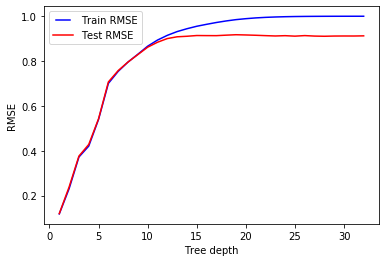

In [31]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    
    dt = DecisionTreeRegressor(max_depth=max_depth)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))

line1, = plt.plot(max_depths, train_results, 'b', label="Train Score")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Tree depth")
plt.show()

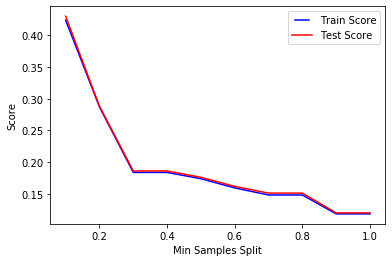

In [30]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))

line1, = plt.plot(min_samples_splits, train_results, "b", label="Train Score")
line2, = plt.plot(min_samples_splits, test_results, "r", label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Min Samples Split")
plt.show()

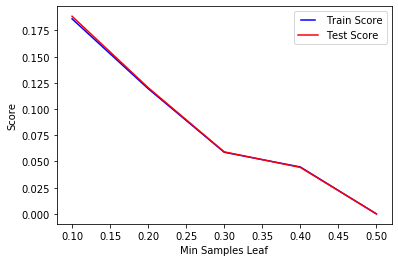

In [33]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))
    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Min Samples Leaf")
plt.show()

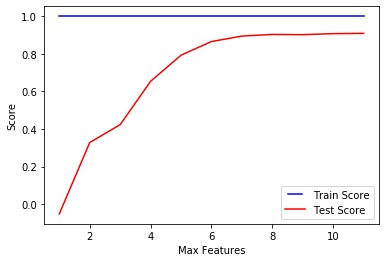

In [36]:
max_features = list(range(1,x.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    
    dt = DecisionTreeRegressor(max_features=max_feature)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))
    

line1, = plt.plot(max_features, train_results, 'b', label="Train Score")
line2, = plt.plot(max_features, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Max Features")
plt.show()

In [43]:
parms = {'max_depth': list(range(10 , 16)),'max_features': ['sqrt', 'log2', 7 , 8, 9, 10 , 11 , 12]}
kf = KFold(n_splits=10)

sc = RandomizedSearchCV(
    DecisionTreeRegressor(),
    parms,
    cv = kf,
    n_jobs=-1,
    verbose=0
).fit(x , y)

sc.best_params_

{'max_features': 12, 'max_depth': 11}

In [48]:
model = DecisionTreeRegressor(max_features = 12, max_depth = 11).fit(xtrain , ytrain)
log_detial = {'Model': '', 'Train-S': 0, 'Test-S': 0, 'R2': 0, 'RMSE': 0, 'AE': 0}
log_detial['Model'] = 'DecisionTreeRegressor'
log_detial['Train-S'] = model.score(xtrain, ytrain)
log_detial['Test-S'] = model.score(xtest, ytest)
log_detial['R2'] = r2_score(ytest, model.predict(xtest))
log_detial['RMSE'] = np.sqrt(mean_squared_error(ytest, model.predict(xtest)))
log_detial['AE'] = mean_absolute_error(ytest, model.predict(xtest))
log_detial

{'Model': 'DecisionTreeRegressor',
 'Train-S': 0.8936424954447334,
 'Test-S': 0.8844708418021409,
 'R2': 0.8844708418021409,
 'RMSE': 7734.371860523925,
 'AE': 3788.6741062988353}

In [44]:
kf = KFold(n_splits=10)
scores = cross_val_score(DecisionTreeRegressor(max_features = 12, max_depth = 11), x , y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.25)


2. Bagging On DecisionTreeRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
model = RandomForestRegressor().fit(xtrain , ytrain)
log_detial = {'Model': '', 'Train-S': 0, 'Test-S': 0, 'R2': 0, 'RMSE': 0, 'AE': 0}
log_detial['Model'] = 'RandomForestRegressor'
log_detial['Train-S'] = model.score(xtrain, ytrain)
log_detial['Test-S'] = model.score(xtest, ytest)
log_detial['R2'] = r2_score(ytest, model.predict(xtest))
log_detial['RMSE'] = np.sqrt(mean_squared_error(ytest, model.predict(xtest)))
log_detial['AE'] = mean_absolute_error(ytest, model.predict(xtest))
log_detial

C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Model': 'DecisionTreeRegressor',
 'Train-S': 0.9888343293894442,
 'Test-S': 0.9438477757157705,
 'R2': 0.9438477757157705,
 'RMSE': 5392.159451878011,
 'AE': 1966.3894555431682}

In [51]:
kf = KFold(n_splits=10)
scores = cross_val_score(RandomForestRegressor(), x , y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\l

Accuracy: 0.69 (+/- 0.23)


C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\l

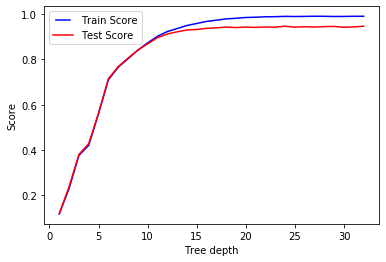

In [52]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    
    dt = RandomForestRegressor(max_depth=max_depth)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))

line1, = plt.plot(max_depths, train_results, 'b', label="Train Score")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Tree depth")
plt.show()

C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\l

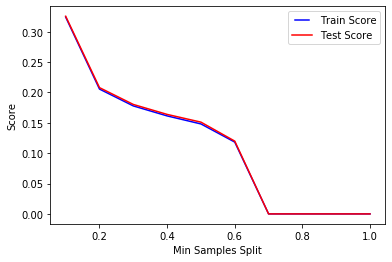

In [53]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = RandomForestRegressor(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))

line1, = plt.plot(min_samples_splits, train_results, "b", label="Train Score")
line2, = plt.plot(min_samples_splits, test_results, "r", label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Min Samples Split")
plt.show()

C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\l

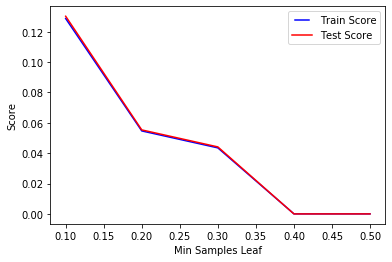

In [54]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = RandomForestRegressor(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))
    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train Score")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Min Samples Leaf")
plt.show()

C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hewlett Packard\Anaconda3\l

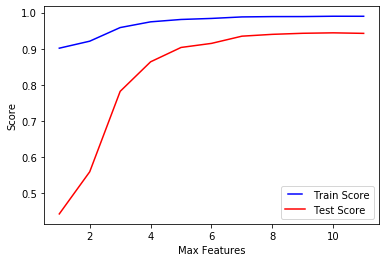

In [55]:
max_features = list(range(1,x.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    
    dt = RandomForestRegressor(max_features=max_feature)
    dt.fit(x_train, y_train)
    
    # Add auc score to previous train results
    train_results.append(dt.score(x_train , y_train))
    
    # Add auc score to previous test results
    test_results.append(dt.score(x_test , y_test))
    

line1, = plt.plot(max_features, train_results, 'b', label="Train Score")
line2, = plt.plot(max_features, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Score")
plt.xlabel("Max Features")
plt.show()

In [58]:
parms = {
    'n_estimators' : [10 , 50 , 100 , 150 , 200 , 250 , 300],
    'bootstrap': [True, False],
    'max_depth': list(range(10 , 16)),
    'max_features': ['sqrt', 'log2', 7 , 8, 9, 10 , 11 , 12]
}

kf = KFold(n_splits=10)
sc = RandomizedSearchCV(
    RandomForestRegressor(),
    parms,
    cv = kf,
    n_jobs=-1,
    verbose=0
).fit(x , y)

sc.best_params_

{'n_estimators': 150, 'max_features': 9, 'max_depth': 14, 'bootstrap': True}

In [59]:
model = RandomForestRegressor(n_estimators =  150, max_features =  9, max_depth =  14, bootstrap =  True).fit(xtrain , ytrain)
log_detial = {'Model': '', 'Train-S': 0, 'Test-S': 0, 'R2': 0, 'RMSE': 0, 'AE': 0}
log_detial['Model'] = 'RandomForestRegressor'
log_detial['Train-S'] = model.score(xtrain, ytrain)
log_detial['Test-S'] = model.score(xtest, ytest)
log_detial['R2'] = r2_score(ytest, model.predict(xtest))
log_detial['RMSE'] = np.sqrt(mean_squared_error(ytest, model.predict(xtest)))
log_detial['AE'] = mean_absolute_error(ytest, model.predict(xtest))
log_detial

{'Model': 'RandomForestRegressor',
 'Train-S': 0.9522544199349727,
 'Test-S': 0.9304832734141646,
 'R2': 0.9304832734141646,
 'RMSE': 5999.622167959898,
 'AE': 2538.814801428601}

In [61]:
kf = KFold(n_splits=10)
scores = cross_val_score(RandomForestRegressor(n_estimators =  150, max_features =  9, max_depth =  14, bootstrap =  True), x , y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.20)
